 # МЕТОД ОПОРНЫХ ВЕКТОРОВ
Метод опорных векторов (support vector machines, SVMs) — очень мощный и гибкий класс алгоритмов обучения с учителем как для классификации, так
и регрессии. Рассмотрим как использовать метод опорных векторов в задачах классификации.

In [24]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
 # Воспользуемся настройками по умолчанию библиотеки Seaborn
import seaborn as sns
sns.set()

Рассмотрим применение метода опорных векторов в задачах классификации.

Тренировка линейного классификатора

In [25]:
# Загрузить библиотеки
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

# Загрузить данные всего с двумя классами и двумя признаками
iris = datasets.load_iris()
features = iris.data[:300,:2]
target = iris.target[:300]
# Стнадартизировать признаки
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)
# Создать опорно-векторный классификатор
svc = LinearSVC(C=1.0, dual=True)
# Натренировать модель
model = svc.fit(features_standardized, target)

Визуализация полученных результатов

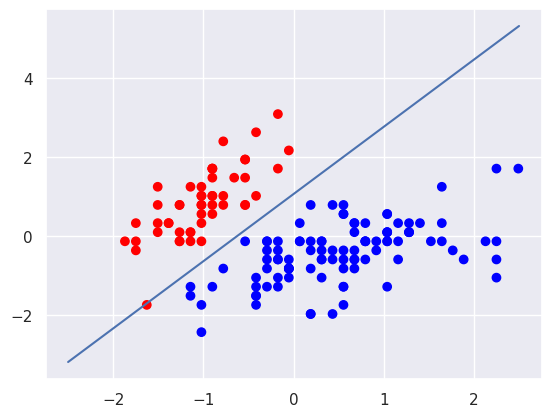

In [26]:
# Загрузить библиотеку
from matplotlib import pyplot as pit


# Вывести точки данных на график и расцветить, используя их класс
color = ["red" if C == 0 else "blue" for C in target]
pit.scatter(features_standardized[:,0], features_standardized[:,1], c=color)

# Создать гиперплоскость
w = svc.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-2.5, 2.5)
yy = a * xx-(svc.intercept_[0]) / w[1]

# Начертить гиперплоскость
pit.plot(xx, yy)
pit. show ()

## SVM-ядра
Возможности метода SVM расширяются при его комбинации с ядрами (kernels).

Пусть требуется обучить опорно-векторный классификатор, но ваши классы линейно неразделимы.

In [ ]:
# Загрузить библиотеки
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import numpy as np
# Задать начальное значение рандомизации
np.random.seed(0)
# Сгенерировать два признака
features = np.random.randn(200, 2)
# Cгенерируем линейно разделимые классы
target_xor = np.logical_xor(features[:, 0] > 0 , features[:, 1] > 0 )
target = np.where(target_xor, 0, 1)

# Создать опорно-векторную машину  с радиально-базисным функциональным ядром (RBF-ядром)
svc = SVC(kernel="rbf", random_state=0, gamma=1, C=1)
# Натренировать классификатор
model = svc.fit(features, target)

Будем использовать функцию, которая выводит на график наблюдения и гиперплоскость границы решения двумерного пространства.

In [ ]:
# Выведем на график наблюдения и гиперплоскость границы решения
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as pit

def plot_decision_regions(X, y, classifier):
    cmap = ListedColormap(("red", "blue"))
    xx1, xx2 = np.meshgrid(np.arange(-3, 3, 0.02), np.arange(-3, 3, 0.02))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.1, cmap=cmap)
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, color=cmap(idx), label=cl)


Рассмотрим данные, содержащие два признака (т. е. две размерности) и вектор целей с классом каждого наблюдения.
Учтем, что классы назначены так, что они линейно неразделимы. То есть нет прямой линии, которую мы могли бы провести, чтобы разделить два класса.

Создадим классификатор опорно-векторной машины с линейным ядром:

In [12]:
# Создать опорно-векторный классификатор с линейным ядром
svc_linear = SVC(kernel="linear", random_state=0, C=1)
# Натренируем модель
svc_linear.fit(features, target)
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear', max_iter=-1, probability=False, random_state=0, shrinking=True,
tol=0.001, verbose=False)

plot_decision_regions(features, target, classifier=svc_linear)
pit.show()


NameError: name 'SVC' is not defined

Видно, линейная гиперплоскость очень плохо справилась с разделением двух классов
 Теперь давайте вместо линейного ядра подставим радиально-базисное функциональное ядро и используем его для того, чтобы обучить новую модель

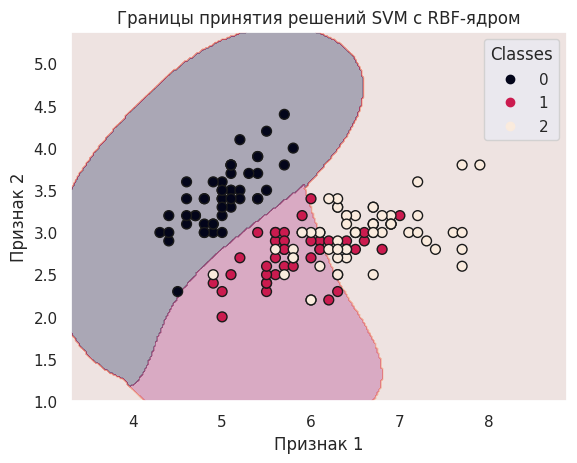

In [44]:
# Создать опорно-векторную машину с радиально-базисным функциональным ядром (RBF-ядром)
svc = SVC(kernel="rbf", random_state=0, gamma=1, C=1)
# Натренировать классификатор
model = svc.fit(features, target)

# Вывести на график наблюдения и гиперплоскость
plot_decision_regions(features, target, classifier=svc)
pit. show ()


Применив радиально-базисное функциональное ядро, мы смогли создать границу решения, способную справиться с разделением двух классов гораздо лучше, чем линейное ядро.

В библиотеке scikit-leam можно выбрать требуемое ядро с помощью параметра kernel. После того как мы выберем ядро, нам нужно указать соответствующие параметры ядра, такие как значение d (используя параметр степени degree) в полиномиальных ядрах и гамма (используя параметр gamma) в радиально-базисных функциональных ядрах. Нам также нужно задать штрафной параметр С. Во время тренировки модели в большинстве случаев все они должны рассматриваться как гиперпараметры, при этом, чтобы определить комбинацию их значений, которая производит
модель с наилучшей результативностью, мы должны использовать методы отбора модели

## РАЗМЫТИЕ ОТСТУПОВ
До сих пор мы рассматривали хорошо очищенных наборов данных, в которых существует идеальная граница решений.
Что делать, если данные в некоторой степени перекрываются?


На этот случай в реализации метода SVM есть небольшой поправочный параметр для «размытия» отступа. Данный параметр разрешает некоторым точкам «заходить» на отступ в тех случаях, когда это приводит к лучшей аппроксимации.
Степень размытости отступа библиотеке scikit-lean контролируется с помощью гиперпараметра С — штрафа, используемого для компенсацииошибок классификации на обучающей выборке границе решения.

С — это параметр общий для всех ядер SVC и он штраф за ошибочное классифицирование точки данных. Когда значение С мало, классификатор получает одобрение на ошибочно классифицированные точки данных (высокое смещение, но низкую дисперсию). Когда значение С большое, классификатор сильно штрафуется за ошибочно классифицированные данные и поэтому отклоняется назад, чтобы избежать любых ошибочно классифицированных точек данных (низкое смещение, но высокая дисперсия).

Рассмотрим влияние изменения параметра C на итоговую аппроксимацию посредством размытия отступа.

In [ ]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

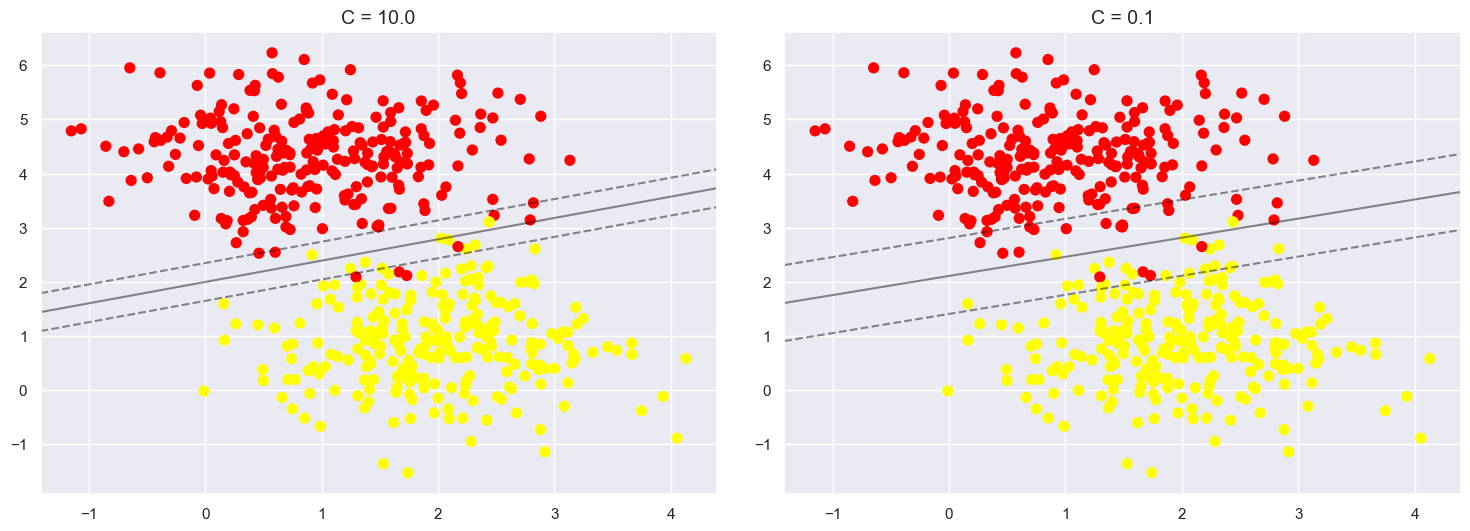

In [ ]:
X, y = make_blobs(n_samples=500, centers=2, random_state=0, cluster_std=0.8)
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, lw=1, facecolors='none')
    axi.set_title('C = {0:.1f}'.format(C), size=14)



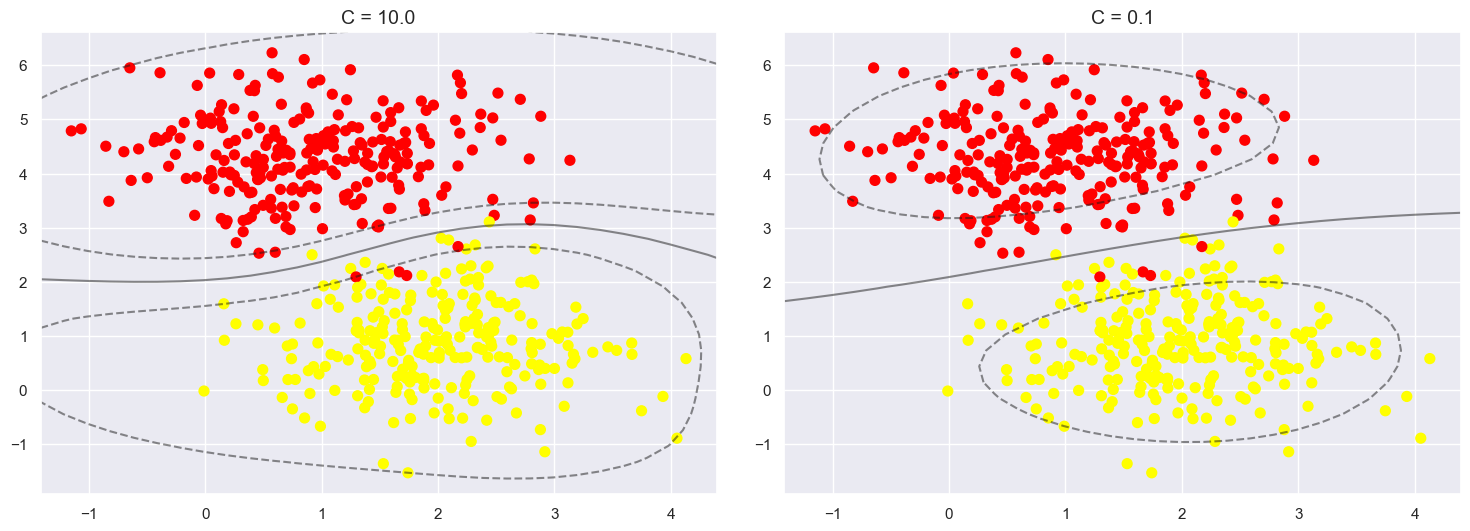

In [ ]:
X, y = make_blobs(n_samples=500, centers=2, random_state=0, cluster_std=0.8)
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='rbf', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, lw=1, facecolors='none')
    axi.set_title('C = {0:.1f}'.format(C), size=14)


# Деревья решений и случайные леса

### Деревья решений
Деревья решений — интуитивно понятные способы классификации или маркирования объектов. По сути, все сводится к классификации путем
задания серии уточняющих вопросов.
Бинарное разбиение позволяет эффективно спроектировать дерево, так как каждый вопрос уменьшает количество вариантов приблизительно вдвое,
быстро сужая возможные варианты даже при большом количестве классов.
В связанных с машинным обучением реализациях деревьев принятия решений вопросы обычно имеют вид выровненных по осям координат разбиений данных, то есть каждый узел дерева разбивает данные на две группы с помощью порогового значения одного из признаков.

Рассмотрим следующие двумерные данные с четырьмя возможными метками классов

In [36]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

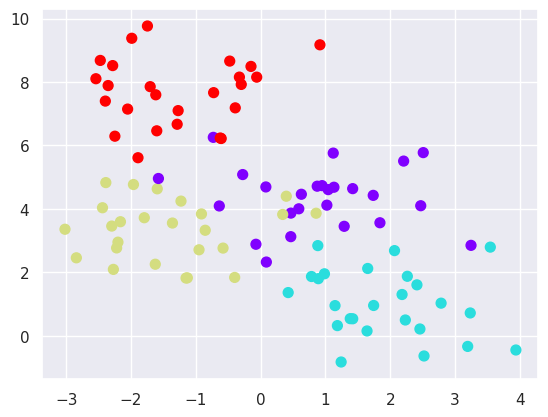

In [37]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=100, centers=4, random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow')


Простое дерево принятия решений для этих данных будет многократно разделять данные по одной или нескольким осям, в соответствии с определенным количественным критерием, и на каждом уровне маркировать новую область согласно большинству лежащих в ней точек.
Процесс обучения дерева принятия решений на наших данных можно выполнить в Scikit-Learn с помощью оценивателя DecisionTreeClassifier

In [38]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X, y)

Функция, облегчающая визуализацию вывода классификатора

In [39]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    # Рисуем обучающие точки
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap, clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    # Обучаем оцениватель
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200), np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    # Создаем цветной график с результатами
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3, levels=np.arange(n_classes + 1) - 0.5, cmap=cmap, zorder=1)
    ax.set(xlim=xlim, ylim=ylim)

Визуализируем результаты классификации на основе дерева принятия решений из примера

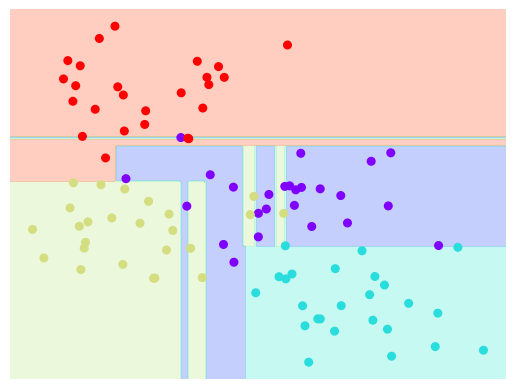

In [40]:
visualize_classifier(DecisionTreeClassifier(), X, y)

Обратите внимание, что по мере возрастания глубины мы получаем области классификации очень странной формы. Например, между желтой
и синей областями появляется узкая и вытянутая в высоту фиолетовая область.
Это результат того, что дерево принятия решений переобучено.

Подобное переобучение присуще всем деревьям принятия решений.


### Ансамбли оценивателей: случайные леса

Случайные леса — пример одного из методов ансамблей (ensemble), основанных на агрегировании результатов ансамбля более простых оценивателей.
Идея комбинации нескольких переобученных оценивателей для снижения эффекта этого переобучения лежит в основе метода ансамблей под названием «баггинг» (bagging).

Бэггинг использует ансамбль параллельно работающих переобучаемых оценивателей и усредняет результаты для получения оптимальной классификации. Ансамбль случайных деревьев принятия решений называется случайным лесом (random forest).

Выполнить подобную бэггинг-классификацию можно вручную с помощью метода оценивателя BaggingClassifier из библиотеки Scikit-Learn

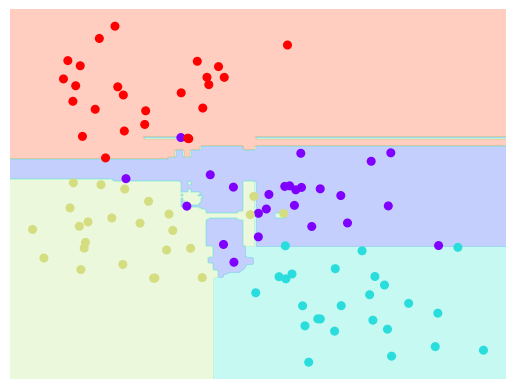

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8, random_state=1)
bag.fit(X, y)
visualize_classifier(bag, X, y)

На практике для рандомизации деревьев принятия решений обеспечивается определенная стохастичность процесса выбора разбиений.
При этом в обучении участвуют все данные, но результаты обучения все равно сохраняют требуемую случайность.
В библиотеке Scikit-Learn подобный оптимизированный ансамбль случайных деревьев принятия решений, автоматически выполняющий всю рандомизацию, реализован в оценивателе RandomForestClassifier.
Все, что остается сделать, — выбрать количество оценивателей и он очень быстро (при необходимости параллельно) обучит ансамбль деревьев.
Подробнее о настройках параметров https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier

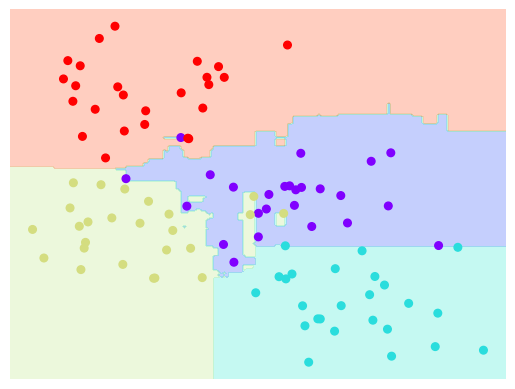

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=0)
visualize_classifier(model, X, y)

# Выбор оптимальной модели

Теперь мы потренируемся обучению, оценке и валидации моделей, подбору оптимальных гиперпараметров, смешиванию моделей. Вам предлагается решить задачу бинарной классификации, а именно построить алгоритм, определяющий превысит ли средний заработок человека порог $50k.

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', sep=', ', engine='python')
# Назначаем имена колонок
columns = ('age workclass fnlwgt education educ-num marital-status occupation relationship '
           'race sex capital-gain capital-loss  hours-per-week native-country salary')

numeric_indices = np.array([0, 2, 4, 10, 11, 12])
categorical_indices = np.array([1, 3, 5, 6, 7, 8, 9, 13])

df.columns = columns.split() #этот метод разделит датасет по колонкам как в массиве columns

df = df.replace('?', np.nan)

df = df.dropna()

df['salary'] = df['salary'].apply((lambda x: x=='>50K')) # Будем предсказывать 1(True), если зарплата больше 50K, 0(False) иначе

In [ ]:
numeric_data = df[df.columns[numeric_indices]]

categorial_data = df[df.columns[categorical_indices]]
categorial_data.head()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
1,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
2,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
3,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba
4,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States


In [ ]:
df['education'].unique(), len(df['education'].unique())

(array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
        'Assoc-acdm', '7th-8th', 'Doctorate', 'Assoc-voc', 'Prof-school',
        '5th-6th', '10th', 'Preschool', '12th', '1st-4th'], dtype=object),
 16)

Выполним кодирование категориальных признаков с помощью унитарного кода (one-hot).

In [ ]:
dummy_features = pd.get_dummies(categorial_data)

In [ ]:
X = pd.concat([numeric_data, dummy_features], axis=1)
X_origin = df.iloc[:, :-1]
X.head()

,age,fnlwgt,educ-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,215646,9,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,53,234721,7,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,28,338409,13,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,37,284582,14,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
y = df['salary']

In [ ]:
X.shape, X_origin.shape

((30161, 104), (30161, 14))

Теперь всё готово для обучения алгоритмов.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values,
                                                    train_size=0.8,
                                                    random_state=42)

In [ ]:
X_test.shape, y_test.shape

((6033, 104), (6033,))

Напишем функцию, визуализирующую поиск оптимального гиперпараметра модели по сетке. Используем идею кросс-валидации.

Для поиска могут использоваться классы GridSearchCV и RandomSearchCV. Первый выполняет поиск по сетке (диапазонам параметров), а второй осуществляет случайный поиск.

Продемонстрируем их работу на примере клсссификатора k ближайших соседей и решающего дерева.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
def search_and_draw(X, y, model, param_name, grid, param_scale='ordinary', draw=True):
    parameters = {param_name: grid}

    CV_model = GridSearchCV(estimator=model,
                            param_grid=parameters,
                            cv=5,
                            scoring='f1',
                            n_jobs=-1,
                            verbose=10)
    CV_model.fit(X, y)
    means = CV_model.cv_results_['mean_test_score']
    error = CV_model.cv_results_['std_test_score']

    if draw:
        plt.figure(figsize=(15,8))
        plt.title('choose ' + param_name)


        if (param_scale == 'log'):
            plt.xscale('log')

        plt.plot(grid, means, label='mean values of score', color='red', lw=3)

        plt.fill_between(grid, means - 2 * error, means + 2 * error,
                         color='green', label='filled area between errors', alpha=0.5)
        legend_box = plt.legend(framealpha=1).get_frame()
        legend_box.set_facecolor("white")
        legend_box.set_edgecolor("black")
        plt.xlabel('parameter')
        plt.ylabel('f1')
        plt.show()

    return means, error

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

Задаим сетку для поиска:
- две модели классификаторов: knn и решающее дерево
- две сетки: 8 точек от 4 до 30 для количества соседей и 29 точек от 1 до 29 для глубины дерева
- для knn используем логарифмическую шкалу, для дерева - обычную

In [ ]:
models = [KNeighborsClassifier(), DecisionTreeClassifier()]
param_names = ['n_neighbors', 'max_depth']
grids = [np.array(np.linspace(4, 30, 8), dtype='int'), np.arange(1, 30)]
param_scales = ['log', 'ordinary']

Запускаем поиск по сетке. **Внимание! Этот процесс может занять некоторе время**

Fitting 5 folds for each of 8 candidates, totalling 40 fits


D:\Devel\Anaconda3\envs\opencv-env\lib\site-packages\sklearn\model_selection\_search.py:976: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan]
  warnings.warn(


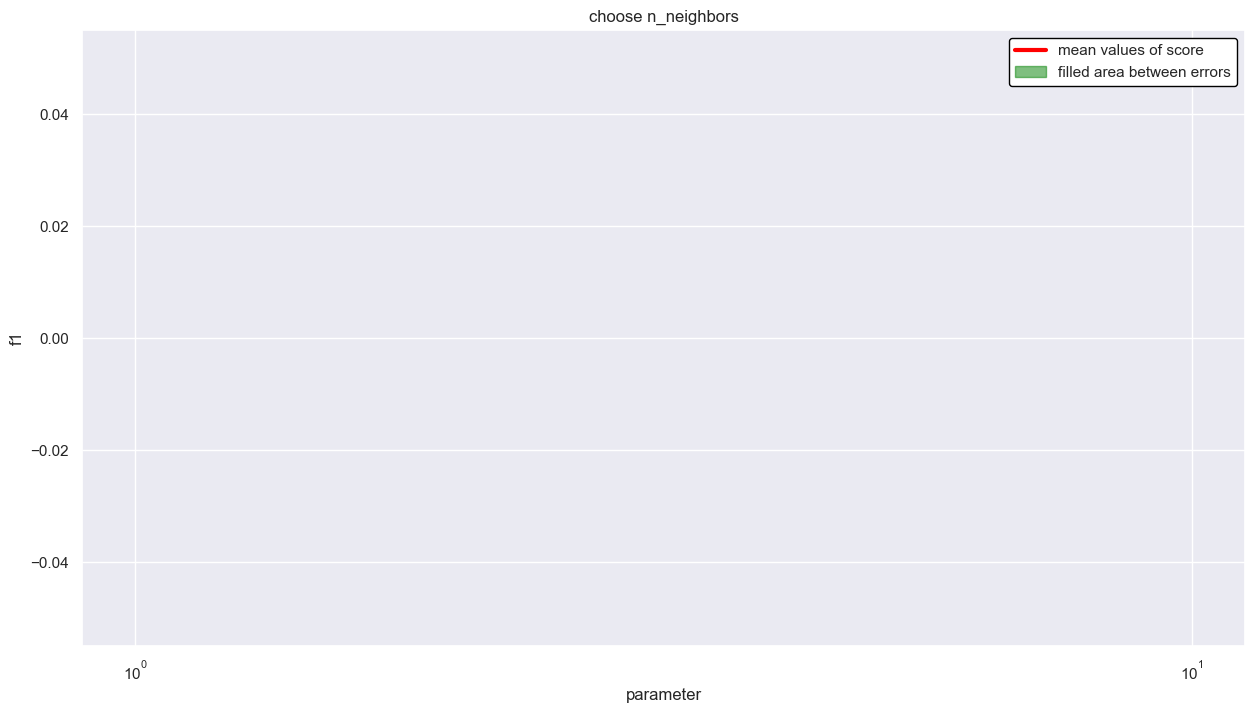

Fitting 5 folds for each of 29 candidates, totalling 145 fits


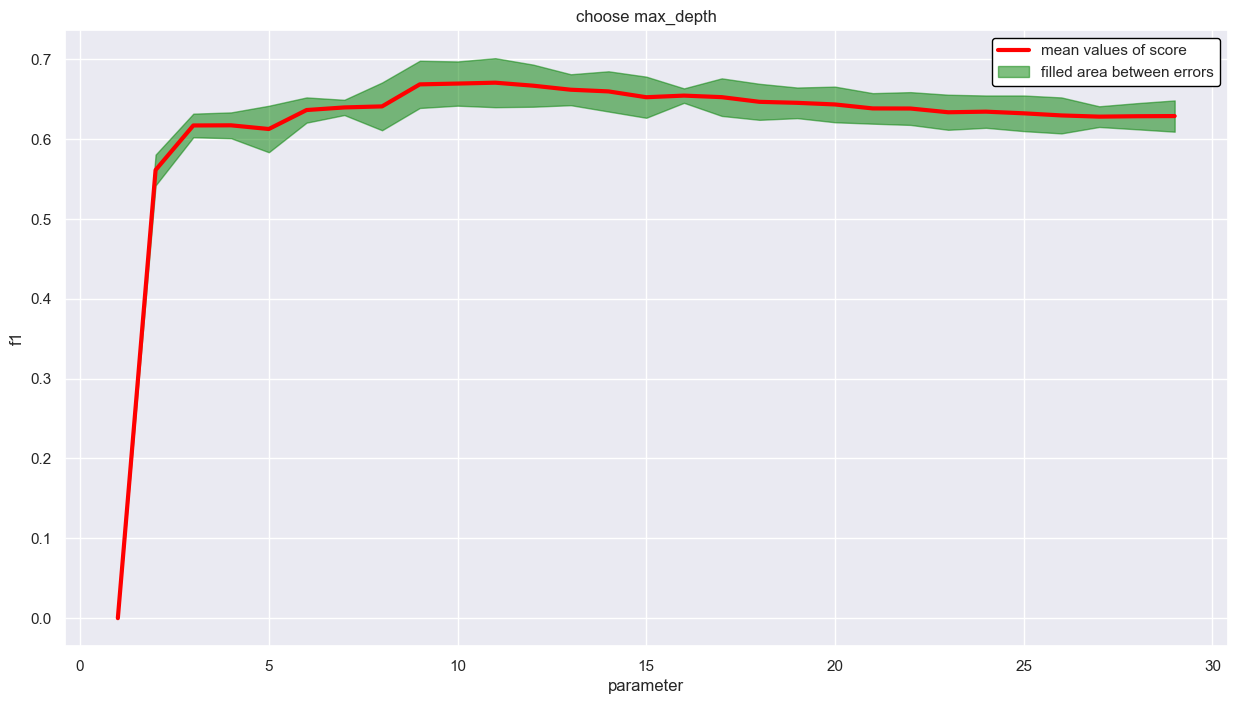

In [ ]:
for model, param_name, grid, param_scale in zip(models,
                                                param_names,
                                                grids,
                                                param_scales):
    search_and_draw(X_train, y_train, model, param_name, grid, param_scale)

Подберём параметр n_estimators в алгоритме случайный лес. Известно, что случайный лес не переобучается. Поэтому график качества будет монотонно возрастать. Следовательно, необходимо найти минимальное значение n_estimators, при котором качество не изменяется.
Поскольку каждое дерево обучается независимо от остальных, достаточно обучить сразу лес из большого количества деревьев, а затем рассмотреть подмножества нужного размера из исходного множества деревьев.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

_Примечание: возможно, вам понадобится отдельно установить пакеты tqdm и ipywidgets_

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from tqdm.notebook import tqdm

In [ ]:
max_trees = 100

values = np.arange(max_trees) + 1

kf = KFold(n_splits=5, shuffle=True, random_state=1234)

global_scores = []

for train_indices, val_indices in tqdm(kf.split(X_train), total=5):
    scores = []

    X_train_kf = X_train[train_indices]
    y_train_kf = y_train[train_indices]

    X_val_kf = X_train[val_indices]
    y_val_kf = y_train[val_indices]

    forest = RandomForestClassifier(n_estimators=max_trees)
    forest.fit(X_train_kf, y_train_kf)
    trees = forest.estimators_

    for number_of_trees in tqdm(values, leave=False):
        thinned_forest = RandomForestClassifier(n_estimators=number_of_trees)

        thinned_forest.n_classes_ = 2
        thinned_forest.estimators_ = trees[:number_of_trees]

        scores.append(roc_auc_score(y_val_kf, thinned_forest.predict_proba(X_val_kf)[:, 1]))

    scores = np.array(scores)

    global_scores.append(scores)

global_scores = np.stack(global_scores, axis=0)

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

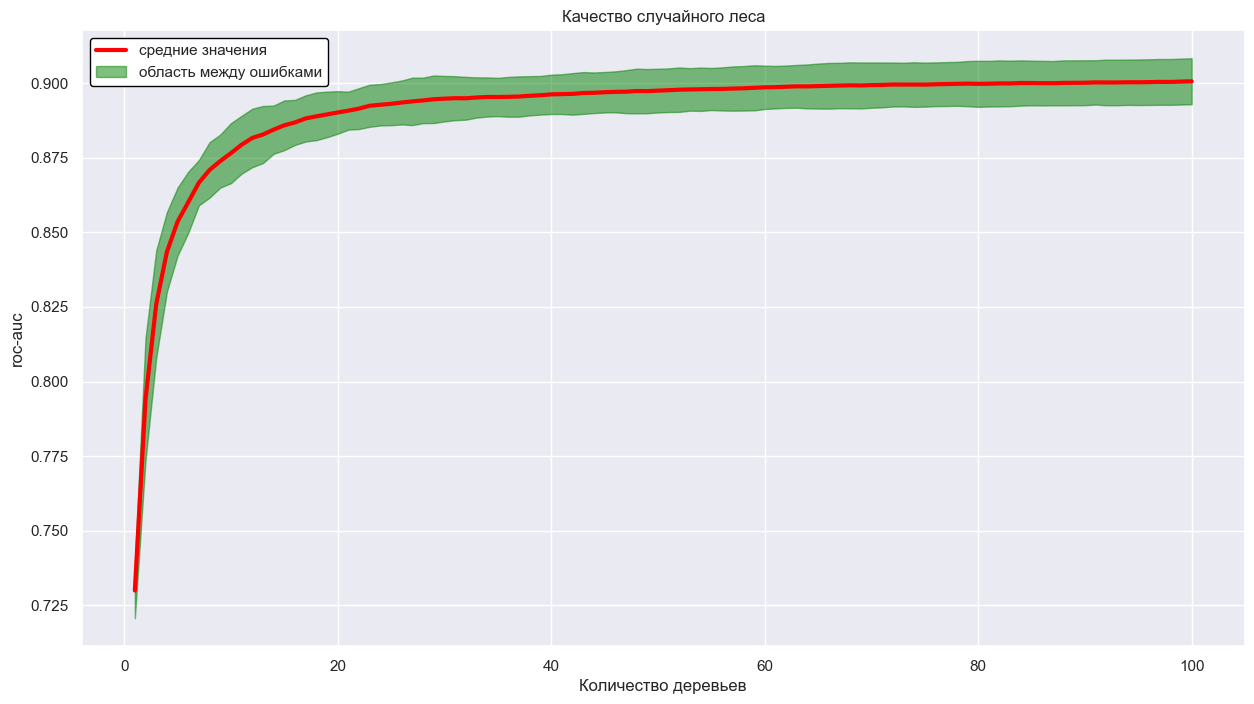

In [ ]:
mean_cross_val_score = global_scores.mean(axis=0)
std_cross_val_score = global_scores.std(axis=0)

plt.figure(figsize=(15,8))
plt.title('Качество случайного леса')

plt.plot(values, mean_cross_val_score, label='средние значения', color='red', lw=3)
plt.fill_between(values,
                 mean_cross_val_score - 2 * std_cross_val_score,
                 mean_cross_val_score + 2 * std_cross_val_score,
                 color='green',
                 label='область между ошибками',
                 alpha=0.5)
legend_box = plt.legend(framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.xlabel('Количество деревьев')
plt.ylabel('roc-auc')

plt.show()

# Задание

Решите задачу классификации по вашему варианту из предыдущей работы следующими тремя методами:
- метод опорных векторов
- дерево принятия решений
- случайный лес

При решении задачи подберите с использованием кросс-проверки следующие параметры алгоритмов:
-  параметр C для SVM
- глубину дерева для дерева принятия решений
- количество оценивателей для случайного леса

Как отработали методы для вашей задачи?
Почему получились такие результаты?

# Теоретические разделы и контрольные вопросы для подготовки к защите

1. Понятие отступа классификатора
1. Максимизация отступа и её отражение в функционале ошибки
1. Функционал ошибки метода опорных векторов и его отличия от логистической регрессии
1. Регулировка размера отступа в SVM
1. Математическое обоснование SVM с точки зрения векторных операций и границы решения
1. Ядра SVM
1. Классификация с использованием опорных точек
1. Факторы, влияющие на выбор ядра и его параметров
1. Деревья принятия решений и основные термины
1. Способ работы готового дерева для решения задач регрессии и классификации
1. Этапы построения дерева
1. Критерии ветвления (помимо основ знать поплярные критерии и использующие их методы - это очень широкий вопрос, из которого может предлагаться рассказать о каком-то критерии в отдельности)
1. Правила остановки
1. Оптимизация уже построенного дерева
1. Недообучение и переобучение деревьев
1. Композиции алгоритмов и предпосылки
1. Метод простого голосования
1. Бэггинг
1. Случайные лес
1. Стэкинг
1. Бустинг
1. Градиентный бустинг: формальная постановка задачи, этапы работы
1. Переобучение градиентного бустинга и методы борьбы с ним
1. Градиентный бустинг в задачах регрессии и классификации

In [49]:
import pandas as pd

# Загрузка данных с указанием разделителя
data = pd.read_csv('exam_регр.csv', sep=';')

# Проверяем имена столбцов и первые строки
print(data.columns)
print(data.head())

# Предобработка данных
# Убедитесь, что нет пропущенных значений
data = data.dropna()

# Преобразование категориальных переменных (например, qualification) в числовые
data = pd.get_dummies(data, columns=['qualification'], drop_first=True)

# Разделение на признаки и целевую переменную
X = data.drop(columns=['Id', 'mean_exam_points'])
y = data['mean_exam_points']


Index(['Id', 'age', 'years_of_experience', 'lesson_price', 'qualification',
       'physics', 'chemistry', 'biology', 'english', 'geography', 'history',
       'mean_exam_points'],
      dtype='object')
   Id   age  years_of_experience  lesson_price  qualification physics  \
0   0  40.0                  0.0        1400.0            1.0     Yes   
1   1  48.0                  4.0        2850.0            3.0     Yes   
2   2  39.0                  0.0        1200.0            1.0      No   
3   3  46.0                  5.0        1400.0            1.0      No   
4   4  43.0                  1.0        1500.0            1.0      No   

  chemistry biology english geography history  mean_exam_points  
0        No      No      No       Yes      No              63.0  
1        No      No      No        No      No              86.0  
2        No      No      No        No      No              53.0  
3        No      No      No        No      No              56.0  
4        No      No      No 

In [50]:
# Разделение данных на обучающую и тестовую выборки

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [51]:
# Настройка и обучение моделей с использованием кросс-проверки
# Метод опорных векторов (SVM)

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR

# Загрузка данных
data = pd.read_csv('exam_регр.csv', sep=';')

# Проверка на наличие пропущенных значений и их удаление
data = data.dropna()

# Преобразование всех категориальных переменных в числовые
categorical_cols = ['qualification', 'physics', 'chemistry', 'biology', 'english', 'geography', 'history']
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Разделение на признаки и целевую переменную
X = data.drop(columns=['Id', 'mean_exam_points'])
y = data['mean_exam_points']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Настройка и обучение модели SVM с использованием кросс-проверки
# Подбор гиперпараметра C
param_grid_svm = {'C': [0.1, 1, 10, 100]}
grid_svm = GridSearchCV(SVR(), param_grid_svm, cv=5)

# Обучение модели
grid_svm.fit(X_train, y_train)

# Получение лучшего параметра C
best_svm = grid_svm.best_estimator_
print(f'Лучший параметр C для SVM: {grid_svm.best_params_}')

# Опционально: оценка модели на тестовой выборке
test_score = best_svm.score(X_test, y_test)
print(f'Точность на тестовой выборке: {test_score}')

Лучший параметр C для SVM: {'C': 100}
Точность на тестовой выборке: 0.5798750403990269


In [52]:
# Дерево принятия решений

from sklearn.tree import DecisionTreeRegressor

# Подбор глубины дерева
param_grid_tree = {'max_depth': [None, 5, 10, 15, 20]}
grid_tree = GridSearchCV(DecisionTreeRegressor(), param_grid_tree, cv=5)
grid_tree.fit(X_train, y_train)

best_tree = grid_tree.best_estimator_
print(f'Лучшая глубина дерева: {grid_tree.best_params_}')


Лучшая глубина дерева: {'max_depth': 5}


In [53]:
# Случайный лес

from sklearn.ensemble import RandomForestRegressor

# Подбор количества оценивателей
param_grid_forest = {'n_estimators': [10, 50, 100, 200]}
grid_forest = GridSearchCV(RandomForestRegressor(), param_grid_forest, cv=5)
grid_forest.fit(X_train, y_train)

best_forest = grid_forest.best_estimator_
print(f'Лучшее количество оценивателей: {grid_forest.best_params_}')


Лучшее количество оценивателей: {'n_estimators': 200}


In [54]:
from sklearn.metrics import mean_squared_error

# Оценка SVM
y_pred_svm = best_svm.predict(X_test)
mse_svm = mean_squared_error(y_test, y_pred_svm)

# Оценка дерева принятия решений
y_pred_tree = best_tree.predict(X_test)
mse_tree = mean_squared_error(y_test, y_pred_tree)

# Оценка случайного леса
y_pred_forest = best_forest.predict(X_test)
mse_forest = mean_squared_error(y_test, y_pred_forest)

print(f'MSE SVM: {mse_svm}')
print(f'MSE Дерево: {mse_tree}')
print(f'MSE Случайный лес: {mse_forest}')


MSE SVM: 75.60166618864659
MSE Дерево: 48.57571759612477
MSE Случайный лес: 47.36380672934873


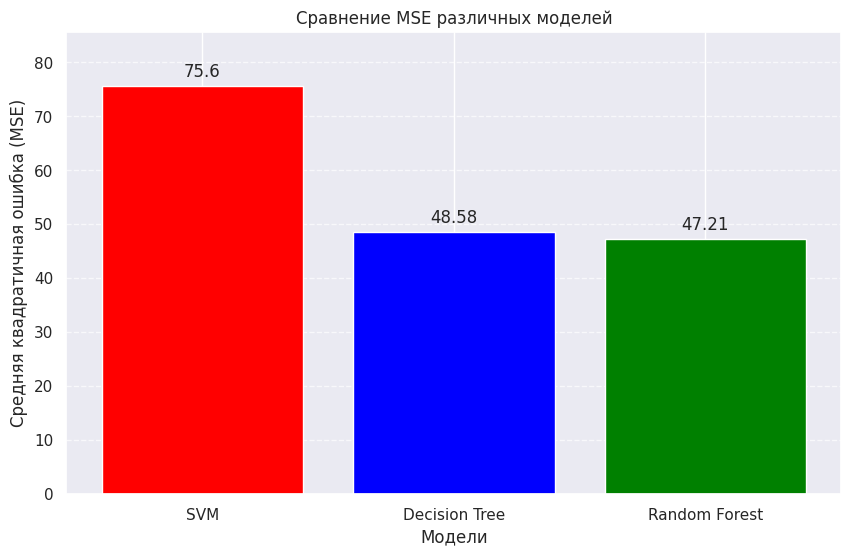

In [55]:
import matplotlib.pyplot as plt
import numpy as np

# Результаты MSE для моделей
models = ['SVM', 'Decision Tree', 'Random Forest']
mse_values = [75.60, 48.58, 47.21]

# Создание столбчатой диаграммы
plt.figure(figsize=(10, 6))
bars = plt.bar(models, mse_values, color=['red', 'blue', 'green'])

# Добавление значений над столбцами
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, round(yval, 2), ha='center', va='bottom')

# Настройка графика
plt.title('Сравнение MSE различных моделей')
plt.xlabel('Модели')
plt.ylabel('Средняя квадратичная ошибка (MSE)')
plt.ylim(0, max(mse_values) + 10)  # Увеличиваем верхнюю границу для лучшего отображения

# Показать график
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


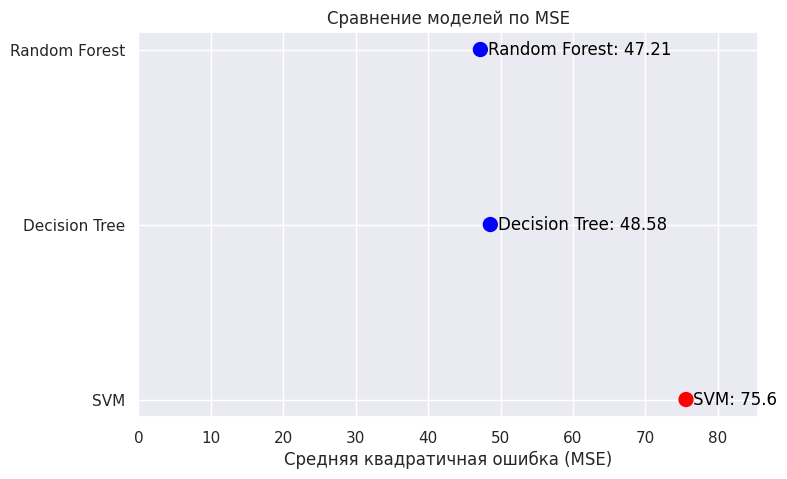

In [21]:
import matplotlib.pyplot as plt

# Ваши данные
models = ['SVM', 'Decision Tree', 'Random Forest']
mse_values = [75.60, 48.58, 47.21]

# Индексы для моделей
y_indices = range(len(models))

# Создание диаграммы рассеивания
plt.figure(figsize=(8, 5))
colors = ['red' if mse > 60 else 'blue' for mse in mse_values]
plt.scatter(mse_values, y_indices, color=colors, s=100)

# Добавление меток для каждой точки
for i, mse in enumerate(mse_values):
    plt.text(mse + 1, i, f'{models[i]}: {mse}', color='black', va='center')

# Настройка графика
plt.title('Сравнение моделей по MSE')
plt.xlabel('Средняя квадратичная ошибка (MSE)')
plt.yticks(y_indices, models)
plt.xlim(0, max(mse_values) + 10)

# Показать график
plt.grid(True)
plt.show()


 # МЕТОД ОПОРНЫХ ВЕКТОРОВ

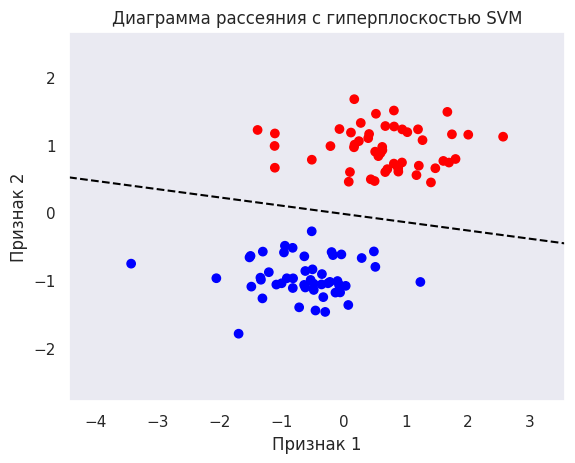

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Генерация случайных данных
X, y = datasets.make_blobs(n_samples=100, centers=2, random_state=6)

# Стандартизация данных
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Обучение модели SVM
svc = SVC(kernel='linear')
svc.fit(X_standardized, y)

# Цвета для точек
colors = ["red" if label == 0 else "blue" for label in y]

# Вывод точек данных на график
plt.scatter(X_standardized[:, 0], X_standardized[:, 1], c=colors)

# Создание гиперплоскости
w = svc.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(X_standardized[:, 0].min() - 1, X_standardized[:, 0].max() + 1)
yy = a * xx - (svc.intercept_[0]) / w[1]

# Начертить гиперплоскость
plt.plot(xx, yy, color='black', linestyle='--')

# Настройка графика
plt.title('Диаграмма рассеяния с гиперплоскостью SVM')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.xlim(X_standardized[:, 0].min() - 1, X_standardized[:, 0].max() + 1)
plt.ylim(X_standardized[:, 1].min() - 1, X_standardized[:, 1].max() + 1)

# Показать график
plt.grid()
plt.show()


## SVM-ядра
Возможности метода SVM расширяются при его комбинации с ядрами (kernels).

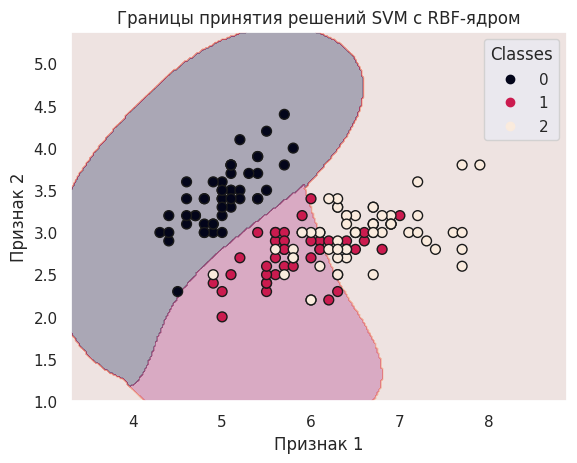

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

# Пример данных (замените на ваш набор данных)
# Здесь мы используем набор данных Iris для примера
iris = datasets.load_iris()
features = iris.data[:, :2]  # Используем только первые два признака для визуализации
target = iris.target

# Создание опорно-векторной машины с радиально-базисным функциональным ядром (RBF-ядром)
svc = SVC(kernel="rbf", random_state=0, gamma=1, C=1)

# Натренировать классификатор
model = svc.fit(features, target)

# Функция для отображения границ принятия решений
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # Создаем граидент для осей
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                         np.arange(y_min, y_max, resolution))

    # Предсказание классов для каждой точки в сетке
    Z = classifier.predict(np.array([xx.ravel(), yy.ravel()]).T)
    Z = Z.reshape(xx.shape)

    # Отображение границ принятия решений
    plt.contourf(xx, yy, Z, alpha=0.3)

    # Отображение наблюдений
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=50)

    # Добавление легенды
    plt.legend(*scatter.legend_elements(), title="Classes")
    plt.title('Границы принятия решений SVM с RBF-ядром')
    plt.xlabel('Признак 1')
    plt.ylabel('Признак 2')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.grid()

# Вызов функции для отображения
plot_decision_regions(features, target, classifier=svc)
plt.show()


## РАЗМЫТИЕ ОТСТУПОВ



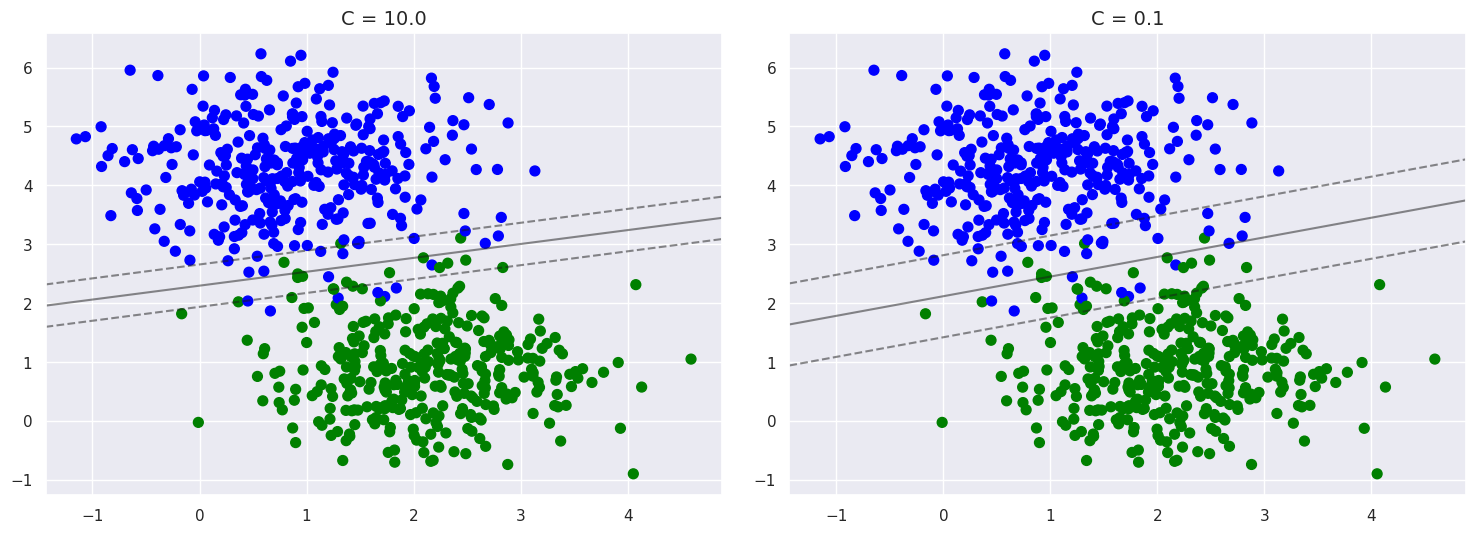

In [87]:
# Создание данных
X, y = make_blobs(n_samples=700, centers=2, random_state=0, cluster_std=0.8)

# Создание графиков
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

# Определение цветов для классов
colors = ['blue', 'green']

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)

    # Используем указанные цвета для классов
    axi.scatter(X[:, 0], X[:, 1], c=[colors[i] for i in y], s=50)

    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, lw=1, facecolors='none')
    axi.set_title('C = {0:.1f}'.format(C), size=14)

plt.show()

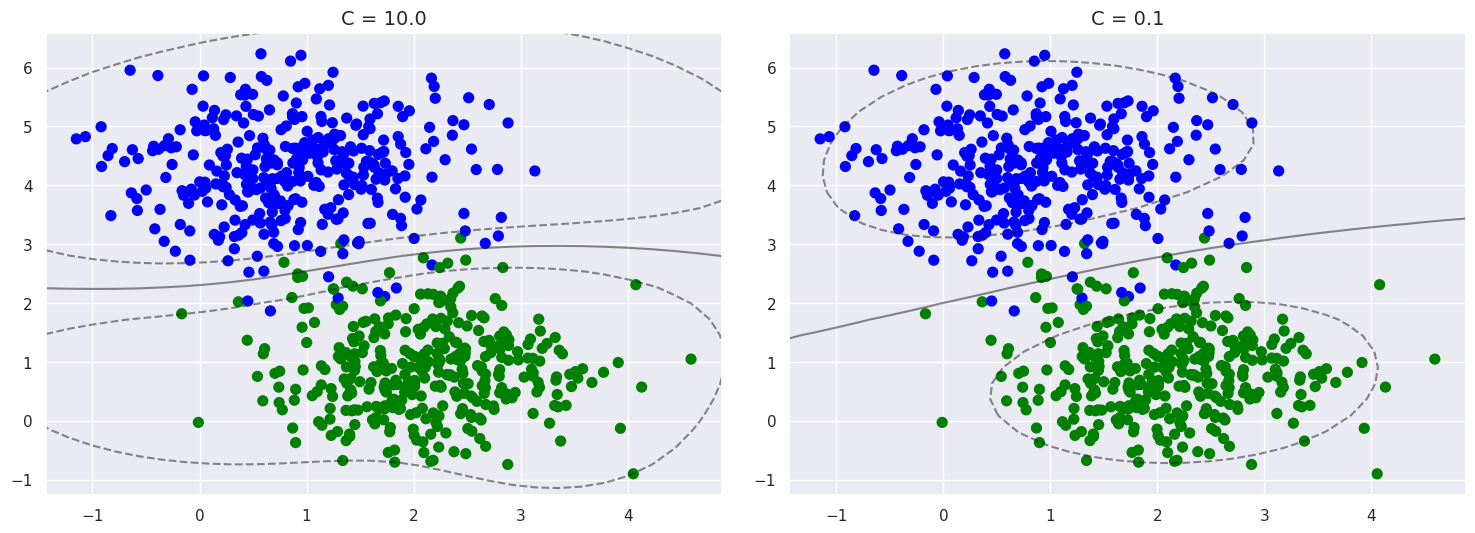

In [85]:
X, y = make_blobs(n_samples=700, centers=2, random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

colors = ['blue', 'green']

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='rbf', C=C).fit(X, y)

    axi.scatter(X[:, 0], X[:, 1], c=[colors[i] for i in y], s=50)

    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, lw=1, facecolors='none')
    axi.set_title('C = {0:.1f}'.format(C), size=14)

plt.show()

## Деревья решений и случайные леса

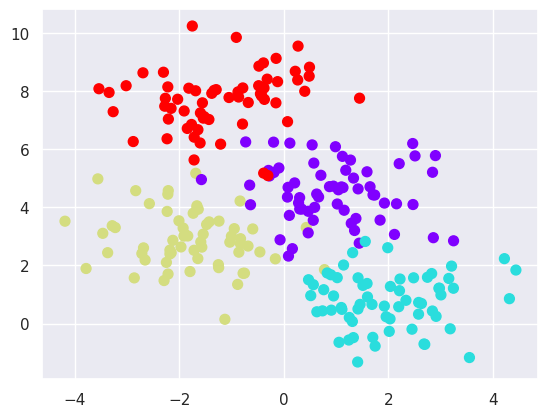

In [88]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=250, centers=4, random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow')


In [89]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X, y)

In [90]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    # Рисуем обучающие точки
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap, clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    # Обучаем оцениватель
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200), np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    # Создаем цветной график с результатами
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3, levels=np.arange(n_classes + 1) - 0.5, cmap=cmap, zorder=1)
    ax.set(xlim=xlim, ylim=ylim)

In [91]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

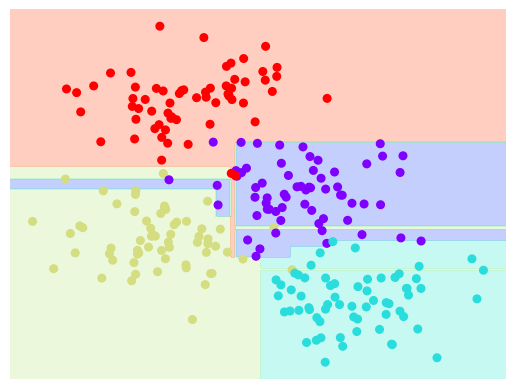

In [92]:
visualize_classifier(DecisionTreeClassifier(), X, y)

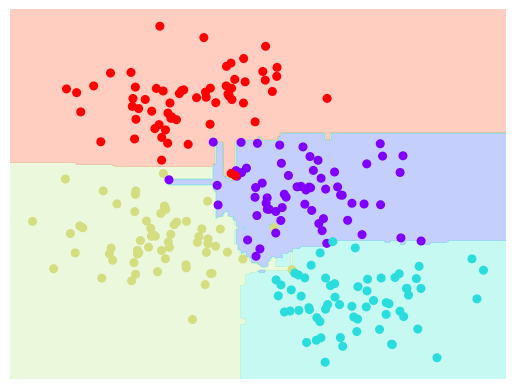

In [93]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=0)
visualize_classifier(model, X, y)